In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


## Reading Dataset

In [2]:
df_athlete = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

## Exploring Dataset

In [3]:
df_athlete.head()
df_athlete.info()
df_athlete.describe()
df_athlete.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [4]:
df_athlete=df_athlete.dropna()  #here we dropped null values because there is more null values in the medal column which is not feasible to impute if we are filling it.


## 1. Distribution of medals by Country

In [5]:
dist_medal = df_athlete.groupby('Team')['Medal'].count().sort_values(ascending=False).reset_index().head(10)  # Here we are counting the no. of medal own by each team and sorting it in ascending order
dist_medal

,Team,Medal
0,United States,4273
1,Soviet Union,2203
2,Germany,1518
3,Australia,1196
4,Russia,1091
5,Canada,1024
6,Great Britain,1010
7,Italy,1008
8,France,965
9,East Germany,935


<function matplotlib.pyplot.show(close=None, block=None)>

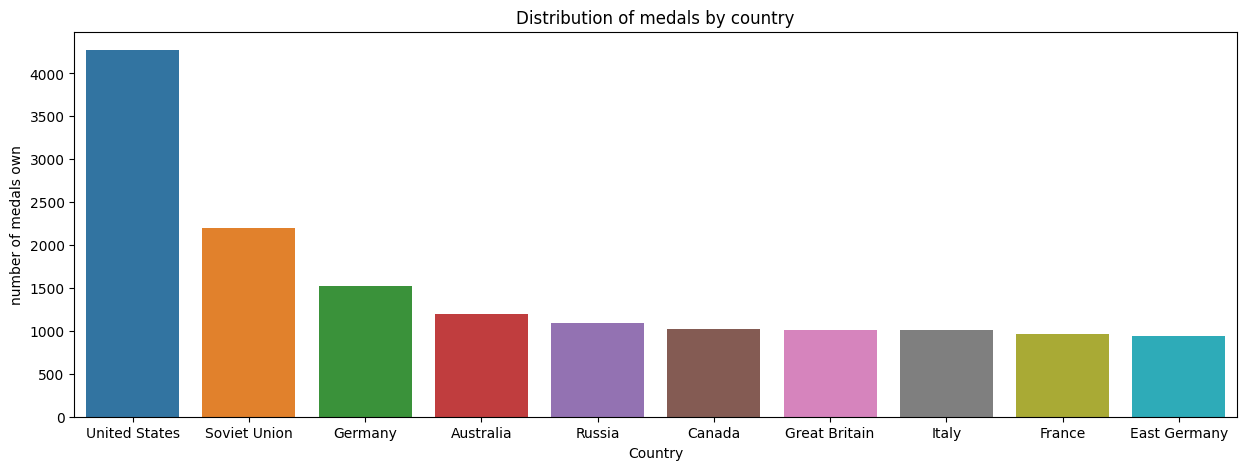

In [6]:
# Plotting graph for above DF

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x='Team', y='Medal', data=dist_medal)
plt.title('Distribution of medals by country')
plt.xlabel('Country')
plt.ylabel('number of medals own')
plt.show

## 2. Number of athletes in each sport 

In [7]:
sprt_athlete = df_athlete.groupby('Sport')['Name'].nunique().sort_values(ascending=False).reset_index(name='No. of athletes').head(10)
sprt_athlete

,Sport,No. of athletes
0,Athletics,2568
1,Rowing,1603
2,Swimming,1255
3,Ice Hockey,977
4,Football,969
5,Hockey,896
6,Wrestling,768
7,Basketball,768
8,Volleyball,752
9,Handball,728


<function matplotlib.pyplot.show(close=None, block=None)>

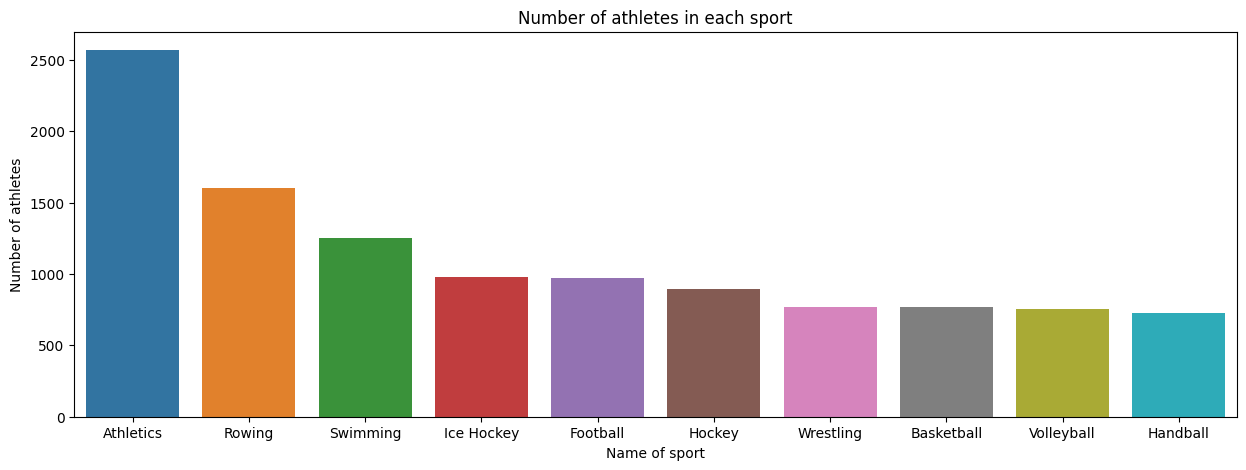

In [8]:
# plotting graph for above DF

plt.figure(figsize=(15,5))
sns.barplot(x='Sport', y='No. of athletes', data=sprt_athlete)
plt.title('Number of athletes in each sport')
plt.xlabel('Name of sport')
plt.ylabel('Number of athletes')
plt.show

## 3. Top countries with gold medals

In [9]:
gold_df = df_athlete[df_athlete['Medal']=='Gold']
gold_df = gold_df.Team.value_counts().sort_values(ascending=False).reset_index(name='No. of gold medals').head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

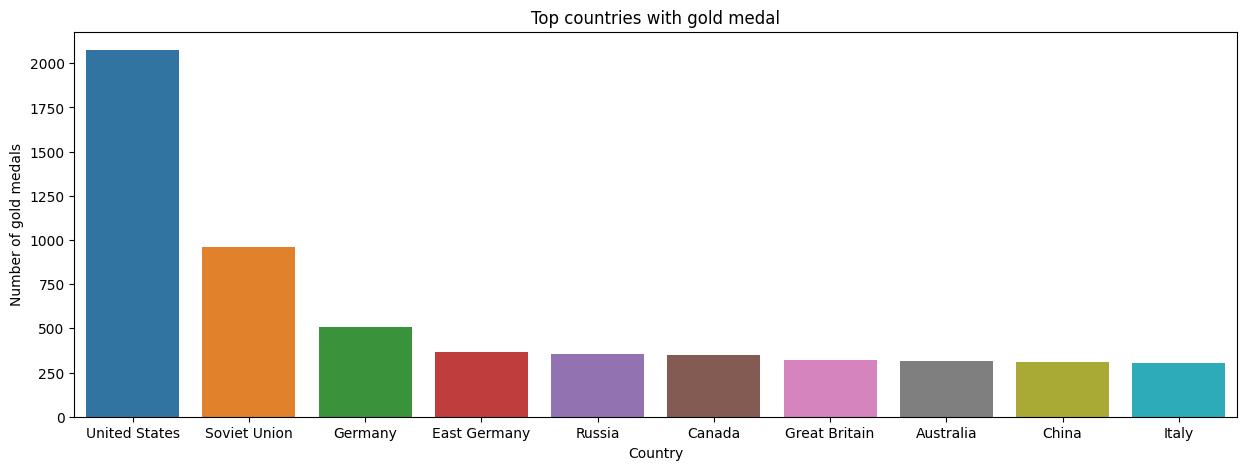

In [10]:
#plotting graph for above DF

plt.figure(figsize=(15,5))
sns.barplot(x='Team', y='No. of gold medals', data=gold_df)
plt.title('Top countries with gold medal')
plt.xlabel('Country')
plt.ylabel('Number of gold medals')
plt.show

## 4. Number of medals over time

In [11]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [12]:
# converting the year column to datetime as it is in int format

df_athlete['Year']=pd.to_datetime(df_athlete['Year'],format='%Y').dt.year
year = df_athlete.Year.value_counts().reset_index(name='Count of medals')
year = year.sort_values(by='Year')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

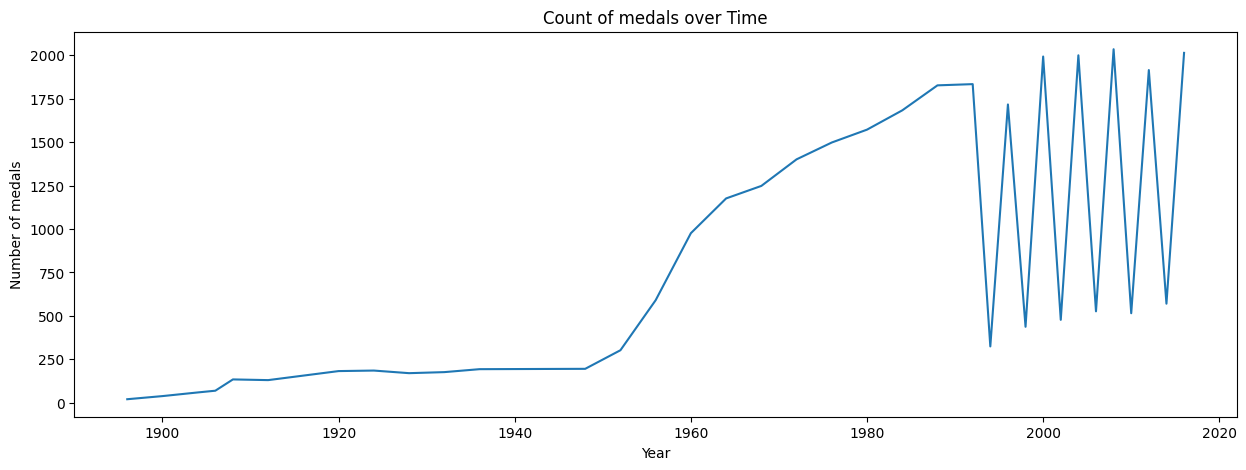

In [13]:
# plotting the above DF

plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Count of medals', data=year)
plt.title('Count of medals over Time')
plt.xlabel('Year')
plt.ylabel('Number of medals')
plt.show